# Packages

In [34]:
from datetime import datetime
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

# Data

## Import

In [159]:
results_path_part1="~/GPU_vs_CPU_tests_of_competing_GBDTs_ml-gpu-py38-cuda101_cust_20200808.csv"
results_path_part2="~/GPU_vs_CPU_tests_of_competing_GBDTs_ml-gpu-py38-cuda101_cust_20200809.csv"

results_df=pd.DataFrame()
for path in [results_path_part1,results_path_part2]:
    results_df=pd.concat([results_df,pd.read_csv(path)])

results_df

,timestamp,algo,version,device,cpu_threads,nrows_train,ncols,total_items,num_iterations,learning_rate,wall_time_secs
0,2020-08-08 20:47:08.676,lightgbm,3.0.0rc1,gpu,1,10000,10,100000,1000,0.1,2.082741
1,2020-08-08 20:47:11.735,xgboost,1.2.0rc1,gpu,1,10000,10,100000,1000,0.1,3.054769
2,2020-08-08 20:47:17.764,lightgbm,3.0.0rc1,gpu,1,10000,100,1000000,1000,0.1,5.952390
3,2020-08-08 20:47:22.358,xgboost,1.2.0rc1,gpu,1,10000,100,1000000,1000,0.1,4.591197
4,2020-08-08 20:47:08.676,lightgbm,3.0.0rc1,gpu,1,10000,10,100000,1000,0.1,2.082741
...,...,...,...,...,...,...,...,...,...,...,...
10291,2020-08-10 20:05:36.260,lightgbm,3.0.0rc1,gpu,1,1000000,100,100000000,1000,0.1,49.333919
10292,2020-08-10 20:11:18.047,lightgbm,3.0.0rc1,gpu,1,10000000,10,100000000,1000,0.1,337.863134
10293,2020-08-10 20:11:21.616,lightgbm,3.0.0rc1,gpu,1,10000,10,100000,1000,0.1,3.434504
10294,2020-08-10 20:11:27.481,lightgbm,3.0.0rc1,gpu,1,10000,100,1000000,1000,0.1,5.785386


## Clean up

In [160]:
# insert date and time features for filtering
results_df['date']=pd.to_datetime(results_df['timestamp']).dt.date
results_df['time']=pd.to_datetime(results_df['timestamp']).dt.time

# eliminate all lightgbm gpu data prior to 2020-08-10 16:00
# (no gpu was used then in case of lightgbm, but the problem 
# was later corrected and data imported from part2 
# is a correction for this problematic subset)
is_date_ok=results_df['date'] == datetime(2020, 8, 10).date()
is_time_ok=results_df['time'] > datetime(2020, 8, 10, 16, 0, 0).time()
results_df['is_lgbm_gpu_data_ok'] = is_date_ok & is_time_ok

results_df['is_all_lgbm_gpu_data'] = results_df['algo'].isin(['lightgbm']) & results_df['device'].isin(['gpu'])
results_df['is_all_data_ok'] = ~results_df['is_all_lgbm_gpu_data'] | results_df['is_lgbm_gpu_data_ok']

results_df=results_df.loc[results_df['is_all_data_ok'], :].copy()
results_df


,timestamp,algo,version,device,cpu_threads,nrows_train,ncols,total_items,num_iterations,learning_rate,wall_time_secs,date,time,is_lgbm_gpu_data_ok,is_all_lgbm_gpu_data,is_all_data_ok
1,2020-08-08 20:47:11.735,xgboost,1.2.0rc1,gpu,1,10000,10,100000,1000,0.1,3.054769,2020-08-08,20:47:11.735000,False,False,True
3,2020-08-08 20:47:22.358,xgboost,1.2.0rc1,gpu,1,10000,100,1000000,1000,0.1,4.591197,2020-08-08,20:47:22.358000,False,False,True
5,2020-08-08 20:47:11.735,xgboost,1.2.0rc1,gpu,1,10000,10,100000,1000,0.1,3.054769,2020-08-08,20:47:11.735000,False,False,True
7,2020-08-08 20:47:22.358,xgboost,1.2.0rc1,gpu,1,10000,100,1000000,1000,0.1,4.591197,2020-08-08,20:47:22.358000,False,False,True
9,2020-08-08 20:48:38.225,xgboost,1.2.0rc1,gpu,1,10000,1000,10000000,1000,0.1,12.667269,2020-08-08,20:48:38.225000,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10291,2020-08-10 20:05:36.260,lightgbm,3.0.0rc1,gpu,1,1000000,100,100000000,1000,0.1,49.333919,2020-08-10,20:05:36.260000,True,True,True
10292,2020-08-10 20:11:18.047,lightgbm,3.0.0rc1,gpu,1,10000000,10,100000000,1000,0.1,337.863134,2020-08-10,20:11:18.047000,True,True,True
10293,2020-08-10 20:11:21.616,lightgbm,3.0.0rc1,gpu,1,10000,10,100000,1000,0.1,3.434504,2020-08-10,20:11:21.616000,True,True,True
10294,2020-08-10 20:11:27.481,lightgbm,3.0.0rc1,gpu,1,10000,100,1000000,1000,0.1,5.785386,2020-08-10,20:11:27.481000,True,True,True


# Features

In [161]:
# insert the data_shape feature (as total_items masks 
# different impact of width and height on performance)
results_df['data_shape']=results_df['nrows_train'].astype(str) + '_x_' + results_df['ncols'].astype(str)
results_df['data_shape'].value_counts()


10000_x_10       6420
10000_x_100      6340
10000_x_1000     6261
10000_x_10000    6185
100000_x_10      6111
100000_x_100     6037
100000_x_1000    5963
1000000_x_10     5889
1000000_x_100    5815
10000000_x_10    5745
Name: data_shape, dtype: int64

In [162]:
# insert the algo_device feature (for measuring
# the differences in implementation efficiency 
# for various algos separately in each device)
results_df['algo_device']=results_df['algo'].astype(str) + '_' + results_df['device'].astype(str)
results_df['algo_device'].value_counts()


lightgbm_cpu    22562
xgboost_cpu     22562
lightgbm_gpu    10296
xgboost_gpu      5346
Name: algo_device, dtype: int64

In [163]:
# insert the algo_device_cores feature (for measuring
# the differences in implementation efficiency 
# for various algos separately in each device 
# and measuring the impact on performance
# of the number of CPU cores)
results_df['algo_device_cores']=results_df['algo'].astype(str) + '_' + \
                                results_df['device'].astype(str) + '_' + \
                                results_df['cpu_threads'].astype(str) + '_cores'
results_df['algo_device_cores'].value_counts()


lightgbm_gpu_1_cores     10296
xgboost_gpu_1_cores       5346
xgboost_cpu_4_cores       5176
lightgbm_cpu_4_cores      5176
xgboost_cpu_8_cores       4740
lightgbm_cpu_8_cores      4740
xgboost_cpu_16_cores      4425
lightgbm_cpu_16_cores     4425
xgboost_cpu_32_cores      3940
lightgbm_cpu_32_cores     3940
xgboost_cpu_64_cores      3540
lightgbm_cpu_64_cores     3540
xgboost_cpu_1_cores        741
lightgbm_cpu_1_cores       741
Name: algo_device_cores, dtype: int64

# Analysis

## Plots

In [166]:
# do not plot measurements for 64-cores as outliers
outliers_threads_num=64
query='cpu_threads != "%s"' % (outliers_threads_num)        

plotted_results_df = results_df.query(query)
plotted_results_df['cpu_threads'].value_counts()


1     17124
4     10352
8      9480
16     8850
32     7880
Name: cpu_threads, dtype: int64

In [170]:
sorted(plotted_results_df.columns)

['algo',
 'algo_device',
 'algo_device_cores',
 'cpu_threads',
 'data_shape',
 'date',
 'device',
 'is_all_data_ok',
 'is_all_lgbm_gpu_data',
 'is_lgbm_gpu_data_ok',
 'learning_rate',
 'ncols',
 'nrows_train',
 'num_iterations',
 'time',
 'timestamp',
 'total_items',
 'version',
 'wall_time_secs']

['algo_device_cores', 'algo_device']
1.343 1307.534


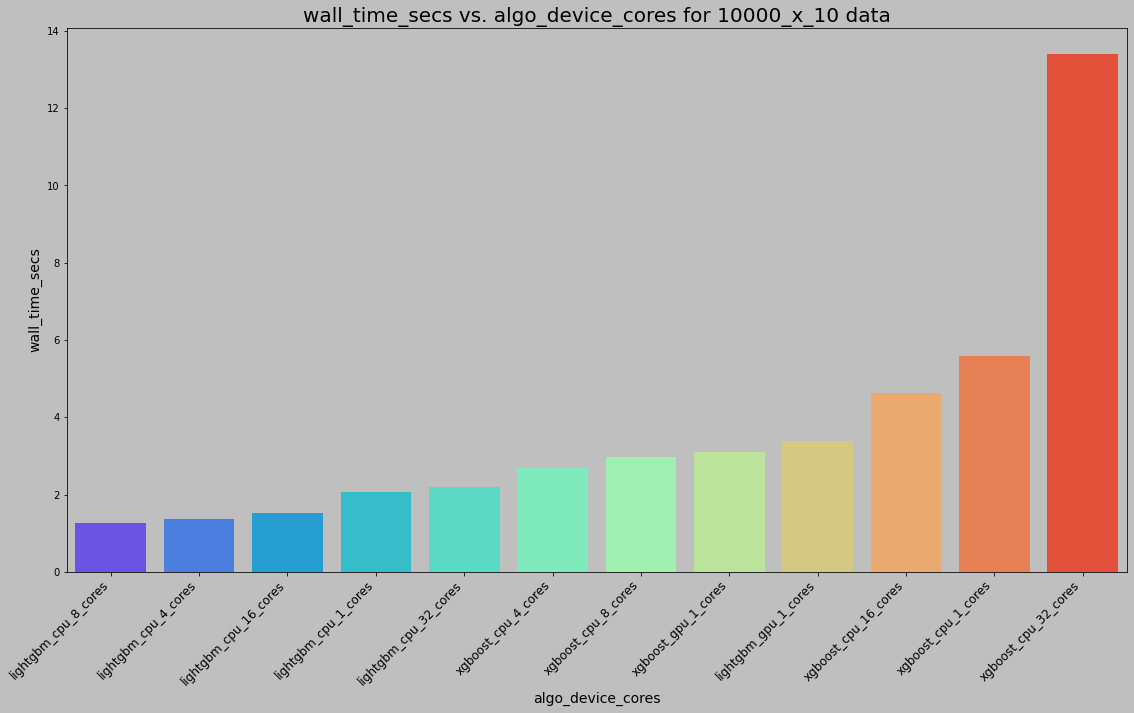

data_shape == "10000_x_10" :
                      wall_time_secs
algo_device_cores                   
lightgbm_cpu_8_cores            1.26
lightgbm_cpu_4_cores            1.37
lightgbm_cpu_16_cores           1.51
lightgbm_cpu_1_cores            2.06
lightgbm_cpu_32_cores           2.20
xgboost_cpu_4_cores             2.69
xgboost_cpu_8_cores             2.97
xgboost_gpu_1_cores             3.11
lightgbm_gpu_1_cores            3.40
xgboost_cpu_16_cores            4.63
xgboost_cpu_1_cores             5.60
xgboost_cpu_32_cores           13.40





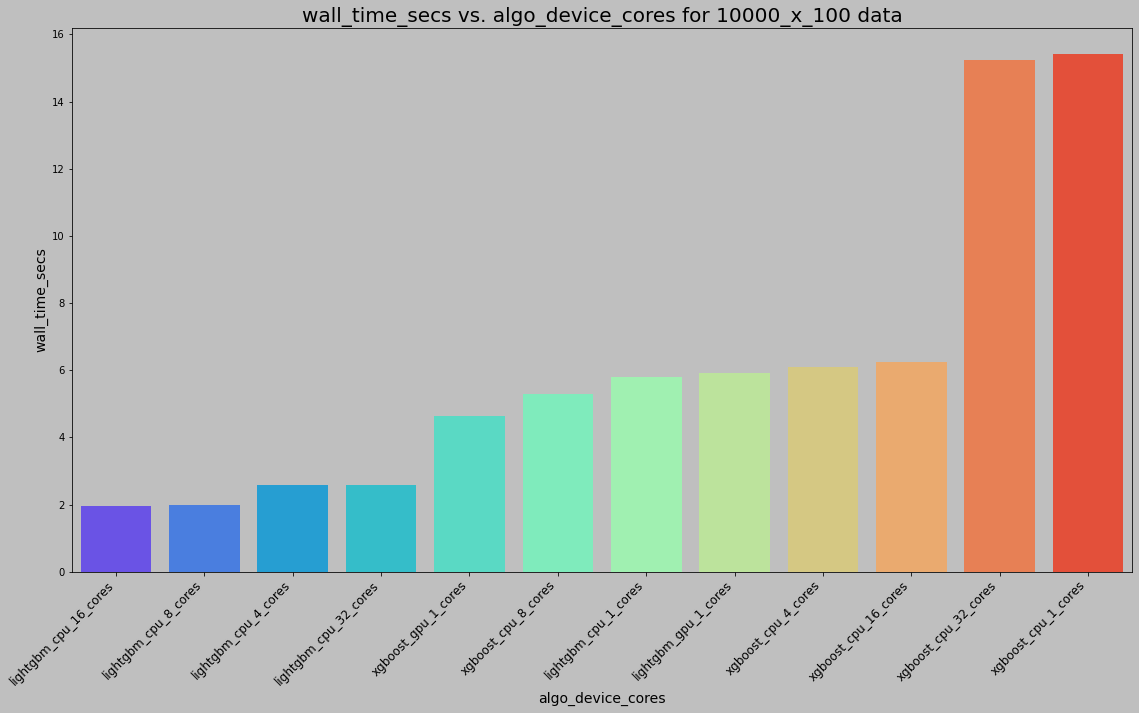

data_shape == "10000_x_100" :
                      wall_time_secs
algo_device_cores                   
lightgbm_cpu_16_cores           1.95
lightgbm_cpu_8_cores            1.99
lightgbm_cpu_4_cores            2.58
lightgbm_cpu_32_cores           2.59
xgboost_gpu_1_cores             4.63
xgboost_cpu_8_cores             5.30
lightgbm_cpu_1_cores            5.79
lightgbm_gpu_1_cores            5.93
xgboost_cpu_4_cores             6.08
xgboost_cpu_16_cores            6.23
xgboost_cpu_32_cores           15.23
xgboost_cpu_1_cores            15.41





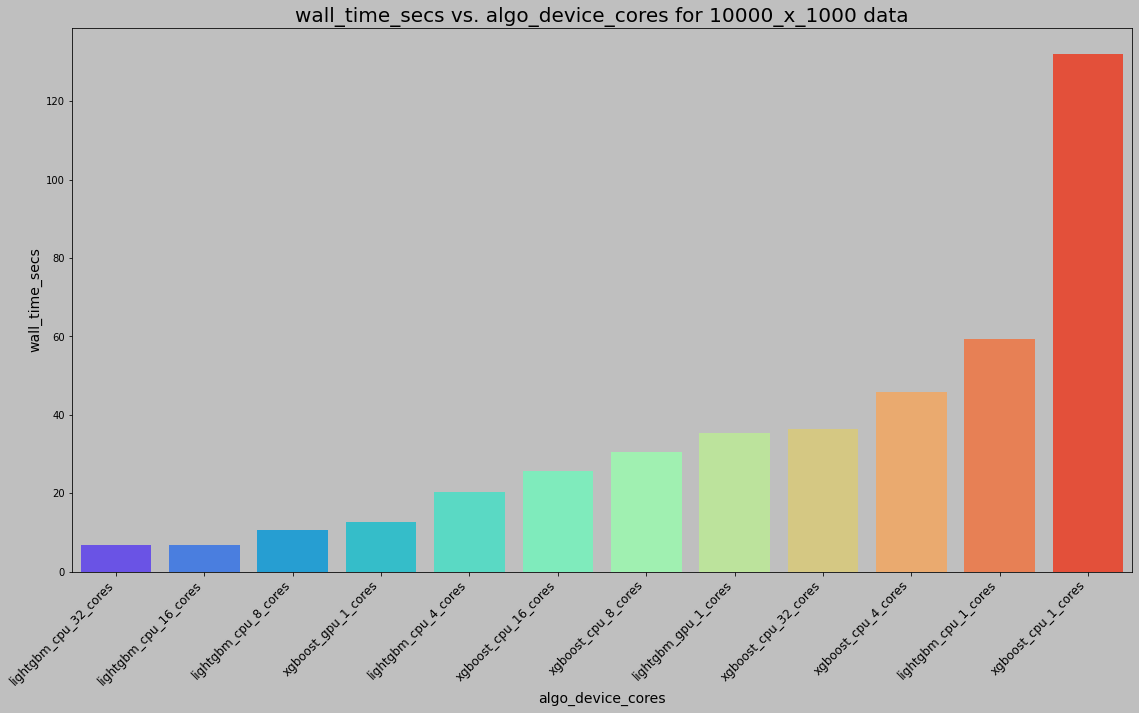

data_shape == "10000_x_1000" :
                      wall_time_secs
algo_device_cores                   
lightgbm_cpu_32_cores           6.75
lightgbm_cpu_16_cores           6.89
lightgbm_cpu_8_cores           10.59
xgboost_gpu_1_cores            12.69
lightgbm_cpu_4_cores           20.37
xgboost_cpu_16_cores           25.63
xgboost_cpu_8_cores            30.61
lightgbm_gpu_1_cores           35.39
xgboost_cpu_32_cores           36.44
xgboost_cpu_4_cores            45.79
lightgbm_cpu_1_cores           59.48
xgboost_cpu_1_cores           132.02





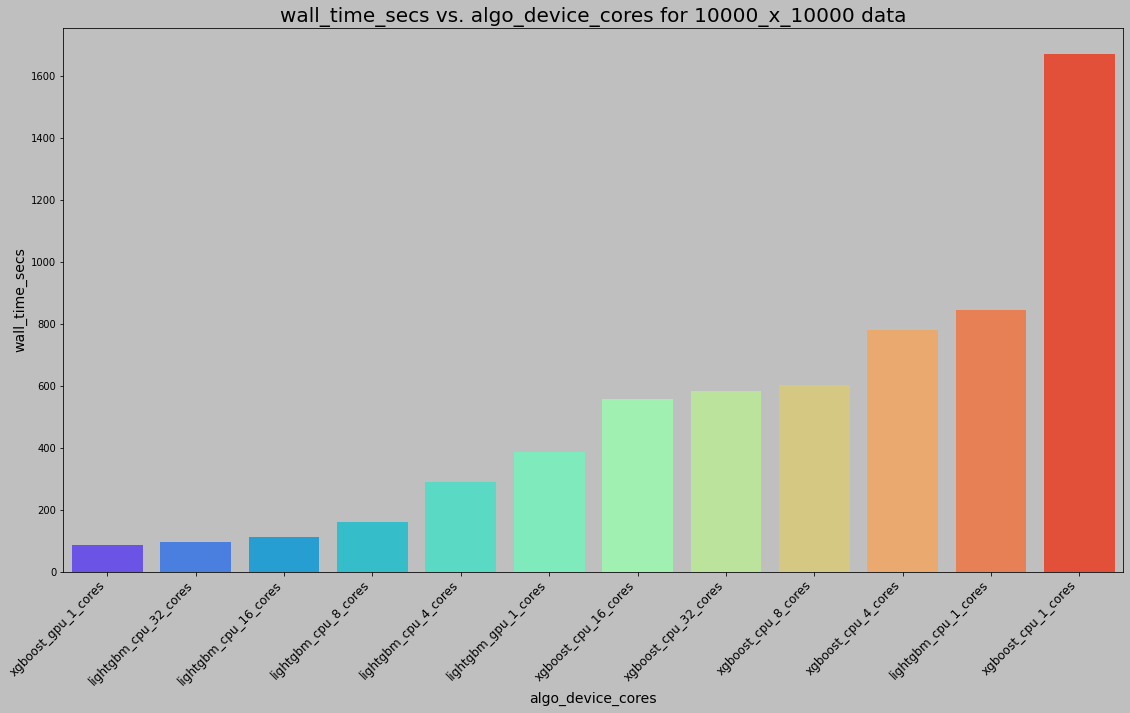

data_shape == "10000_x_10000" :
                      wall_time_secs
algo_device_cores                   
xgboost_gpu_1_cores            84.98
lightgbm_cpu_32_cores          97.42
lightgbm_cpu_16_cores         113.16
lightgbm_cpu_8_cores          160.83
lightgbm_cpu_4_cores          289.49
lightgbm_gpu_1_cores          385.35
xgboost_cpu_16_cores          558.40
xgboost_cpu_32_cores          582.32
xgboost_cpu_8_cores           604.22
xgboost_cpu_4_cores           779.05
lightgbm_cpu_1_cores          845.97
xgboost_cpu_1_cores          1670.55





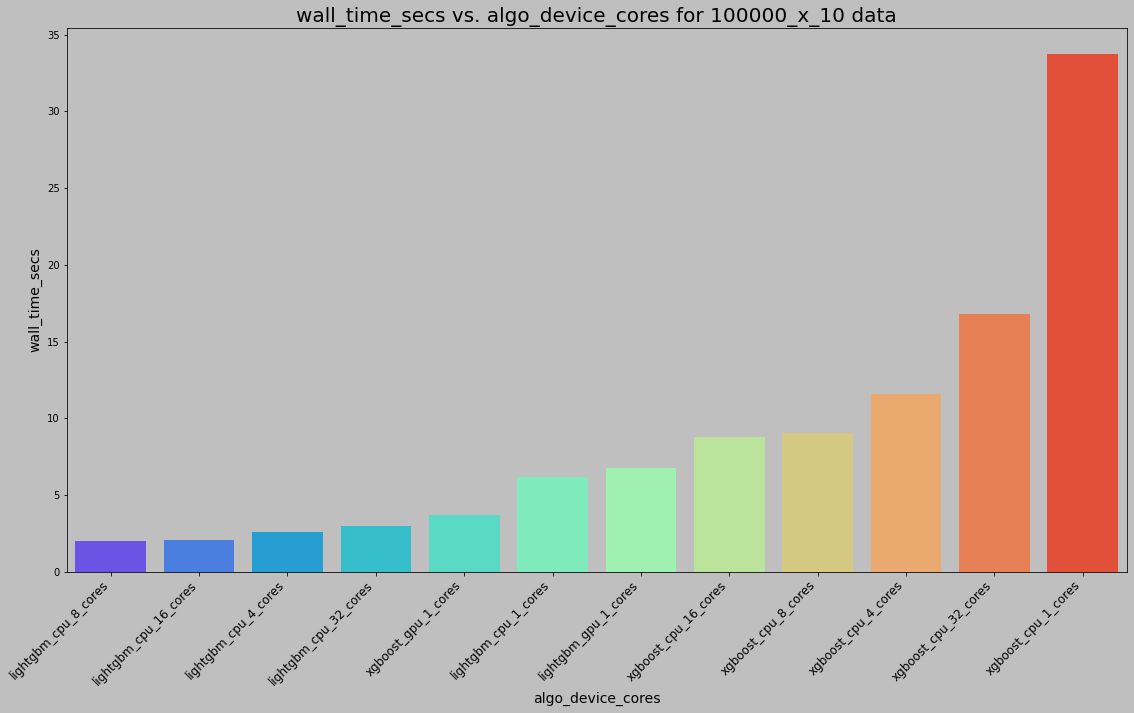

data_shape == "100000_x_10" :
                      wall_time_secs
algo_device_cores                   
lightgbm_cpu_8_cores            1.99
lightgbm_cpu_16_cores           2.10
lightgbm_cpu_4_cores            2.62
lightgbm_cpu_32_cores           2.96
xgboost_gpu_1_cores             3.70
lightgbm_cpu_1_cores            6.17
lightgbm_gpu_1_cores            6.75
xgboost_cpu_16_cores            8.75
xgboost_cpu_8_cores             9.03
xgboost_cpu_4_cores            11.57
xgboost_cpu_32_cores           16.79
xgboost_cpu_1_cores            33.74





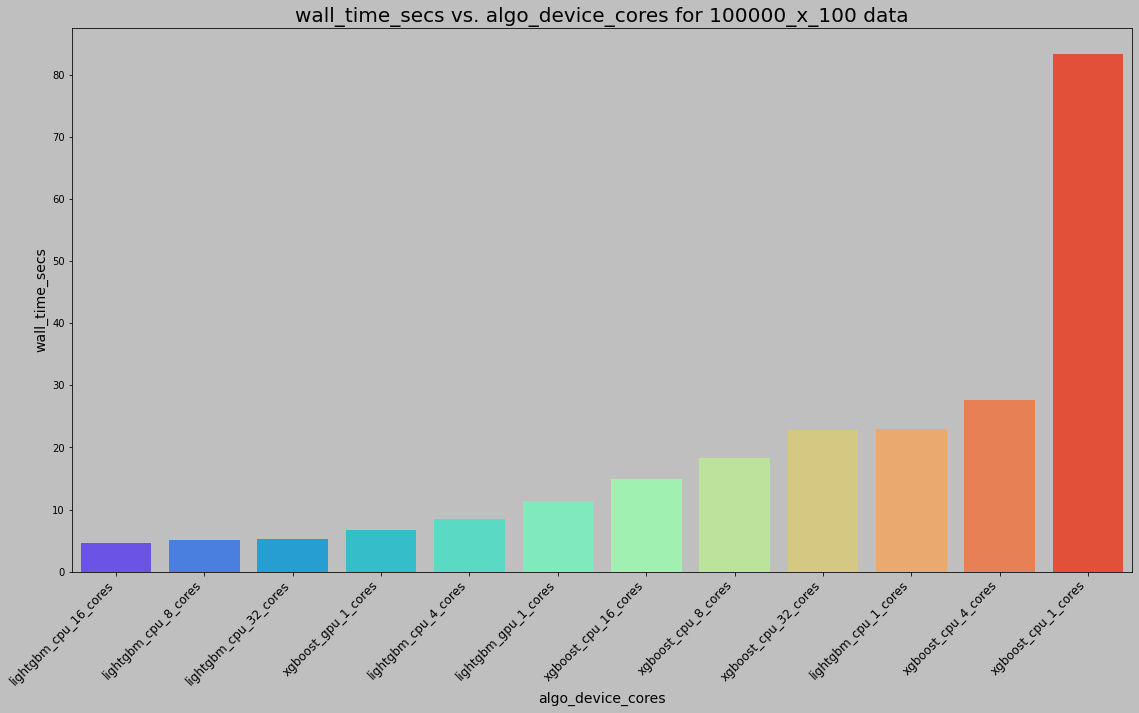

data_shape == "100000_x_100" :
                      wall_time_secs
algo_device_cores                   
lightgbm_cpu_16_cores           4.68
lightgbm_cpu_8_cores            5.12
lightgbm_cpu_32_cores           5.31
xgboost_gpu_1_cores             6.65
lightgbm_cpu_4_cores            8.46
lightgbm_gpu_1_cores           11.31
xgboost_cpu_16_cores           15.01
xgboost_cpu_8_cores            18.29
xgboost_cpu_32_cores           22.75
lightgbm_cpu_1_cores           22.91
xgboost_cpu_4_cores            27.60
xgboost_cpu_1_cores            83.32





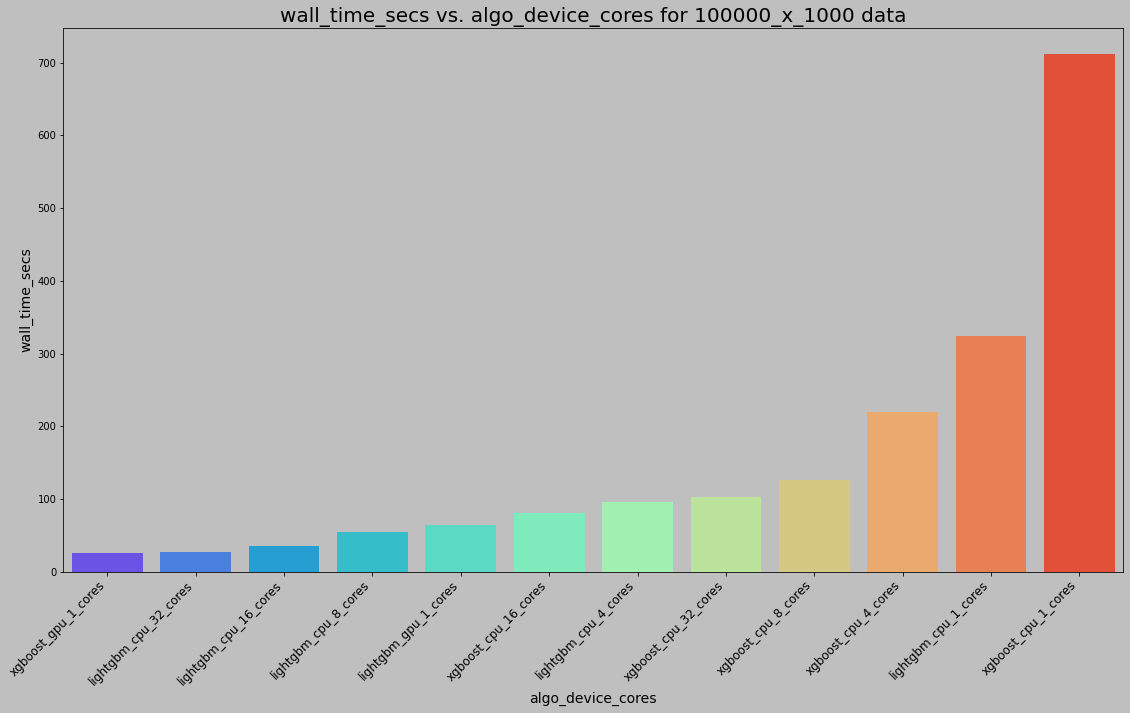

data_shape == "100000_x_1000" :
                      wall_time_secs
algo_device_cores                   
xgboost_gpu_1_cores            25.61
lightgbm_cpu_32_cores          27.35
lightgbm_cpu_16_cores          34.84
lightgbm_cpu_8_cores           54.63
lightgbm_gpu_1_cores           64.18
xgboost_cpu_16_cores           80.39
lightgbm_cpu_4_cores           95.92
xgboost_cpu_32_cores          102.34
xgboost_cpu_8_cores           126.65
xgboost_cpu_4_cores           220.32
lightgbm_cpu_1_cores          323.64
xgboost_cpu_1_cores           711.93





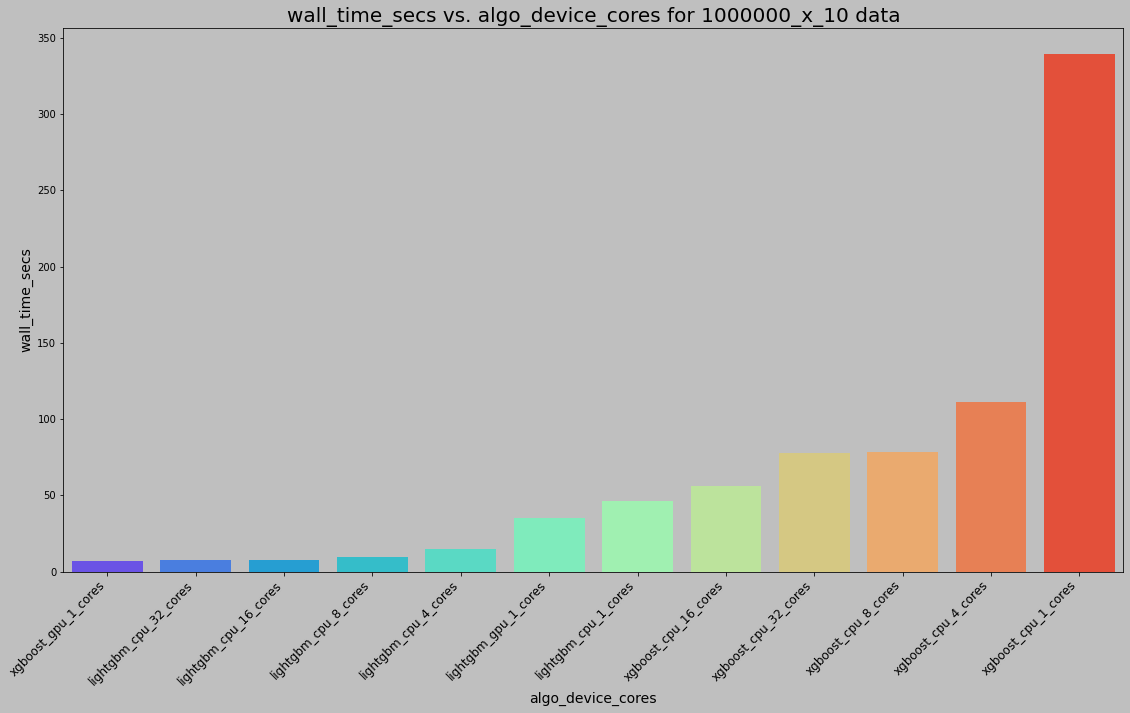

data_shape == "1000000_x_10" :
                      wall_time_secs
algo_device_cores                   
xgboost_gpu_1_cores             6.98
lightgbm_cpu_32_cores           7.43
lightgbm_cpu_16_cores           7.43
lightgbm_cpu_8_cores            9.71
lightgbm_cpu_4_cores           15.02
lightgbm_gpu_1_cores           35.29
lightgbm_cpu_1_cores           46.65
xgboost_cpu_16_cores           56.31
xgboost_cpu_32_cores           78.05
xgboost_cpu_8_cores            78.75
xgboost_cpu_4_cores           110.96
xgboost_cpu_1_cores           339.23





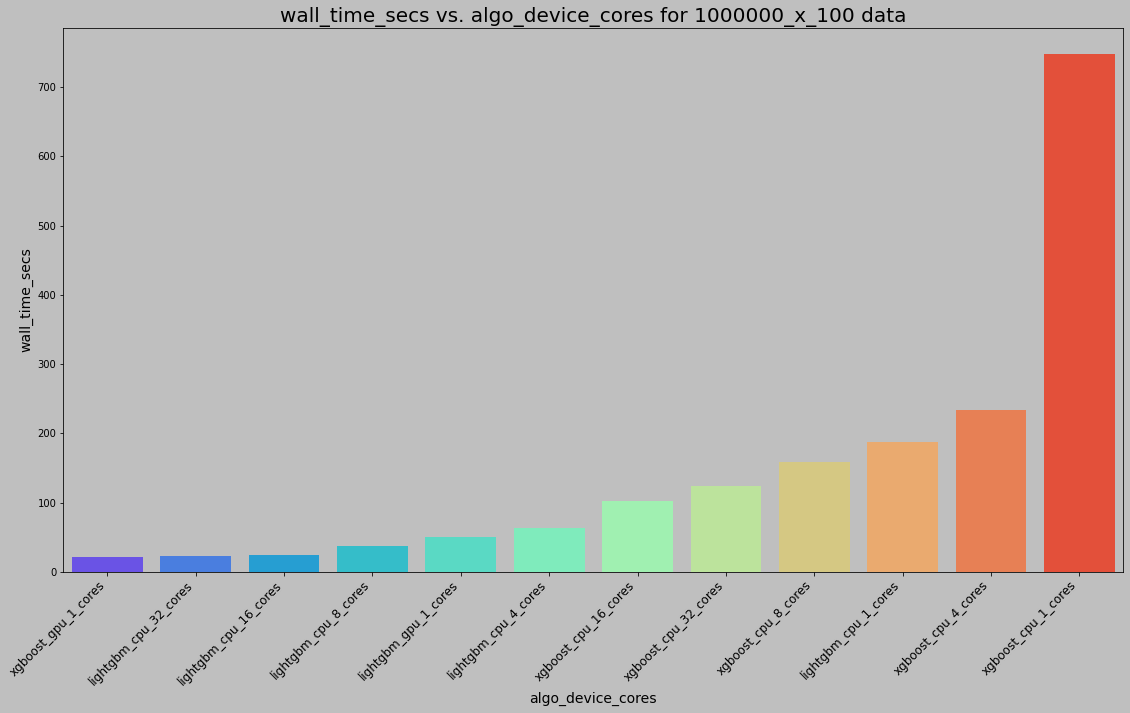

data_shape == "1000000_x_100" :
                      wall_time_secs
algo_device_cores                   
xgboost_gpu_1_cores            21.10
lightgbm_cpu_32_cores          22.51
lightgbm_cpu_16_cores          24.91
lightgbm_cpu_8_cores           37.81
lightgbm_gpu_1_cores           49.61
lightgbm_cpu_4_cores           63.49
xgboost_cpu_16_cores          101.99
xgboost_cpu_32_cores          123.94
xgboost_cpu_8_cores           158.55
lightgbm_cpu_1_cores          187.31
xgboost_cpu_4_cores           234.29
xgboost_cpu_1_cores           747.68





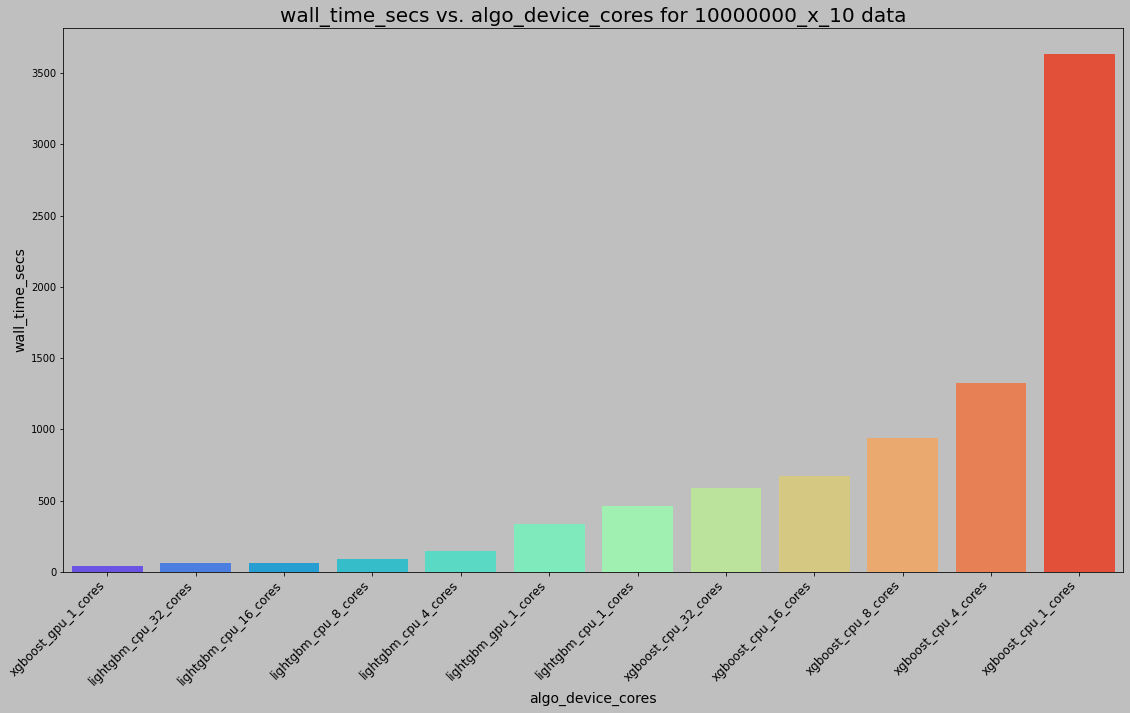

data_shape == "10000000_x_10" :
                      wall_time_secs
algo_device_cores                   
xgboost_gpu_1_cores            39.44
lightgbm_cpu_32_cores          58.18
lightgbm_cpu_16_cores          58.36
lightgbm_cpu_8_cores           89.00
lightgbm_cpu_4_cores          145.42
lightgbm_gpu_1_cores          336.75
lightgbm_cpu_1_cores          458.82
xgboost_cpu_32_cores          590.41
xgboost_cpu_16_cores          671.20
xgboost_cpu_8_cores           939.05
xgboost_cpu_4_cores          1325.92
xgboost_cpu_1_cores          3633.07





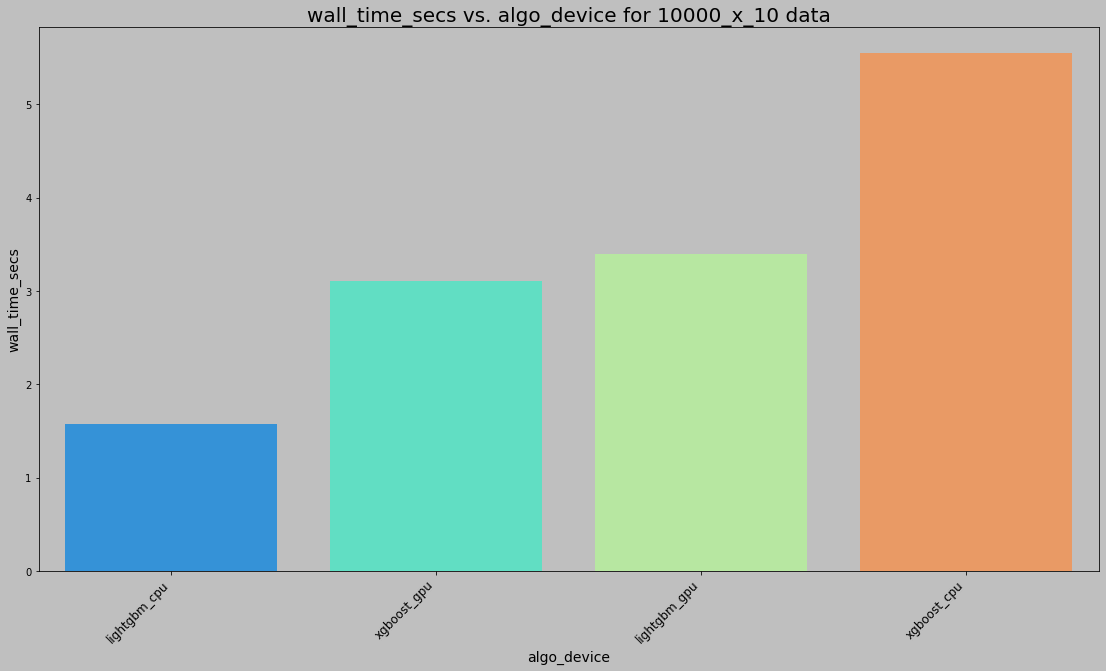

data_shape == "10000_x_10" :
             wall_time_secs
algo_device                
lightgbm_cpu           1.58
xgboost_gpu            3.11
lightgbm_gpu           3.40
xgboost_cpu            5.55





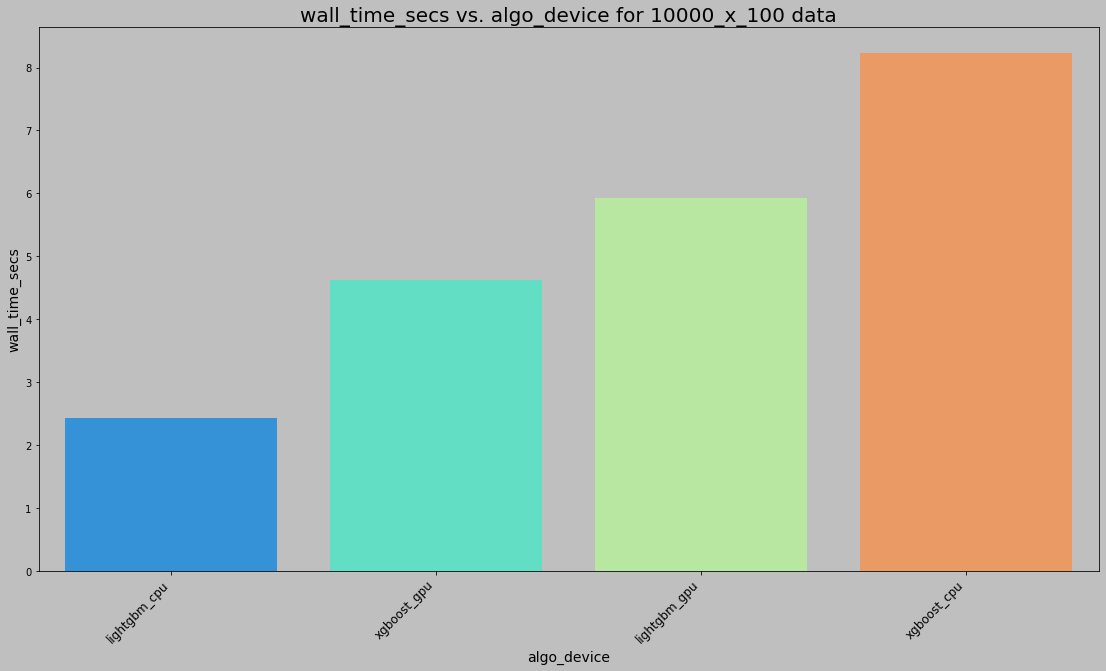

data_shape == "10000_x_100" :
             wall_time_secs
algo_device                
lightgbm_cpu           2.43
xgboost_gpu            4.63
lightgbm_gpu           5.93
xgboost_cpu            8.23





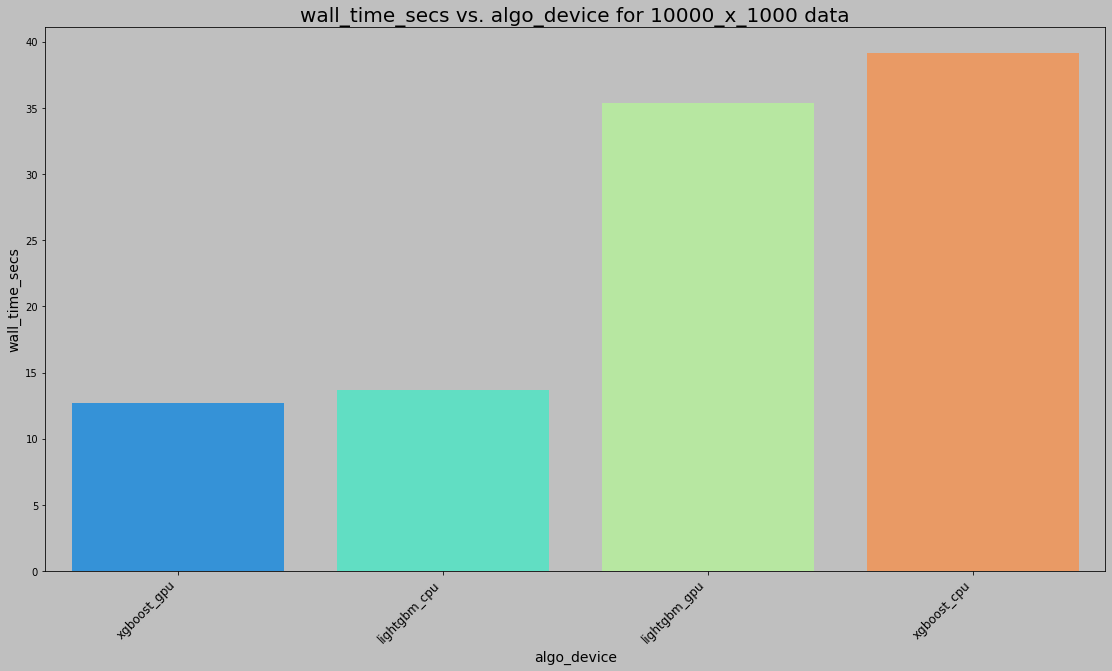

data_shape == "10000_x_1000" :
             wall_time_secs
algo_device                
xgboost_gpu           12.69
lightgbm_cpu          13.68
lightgbm_gpu          35.39
xgboost_cpu           39.12





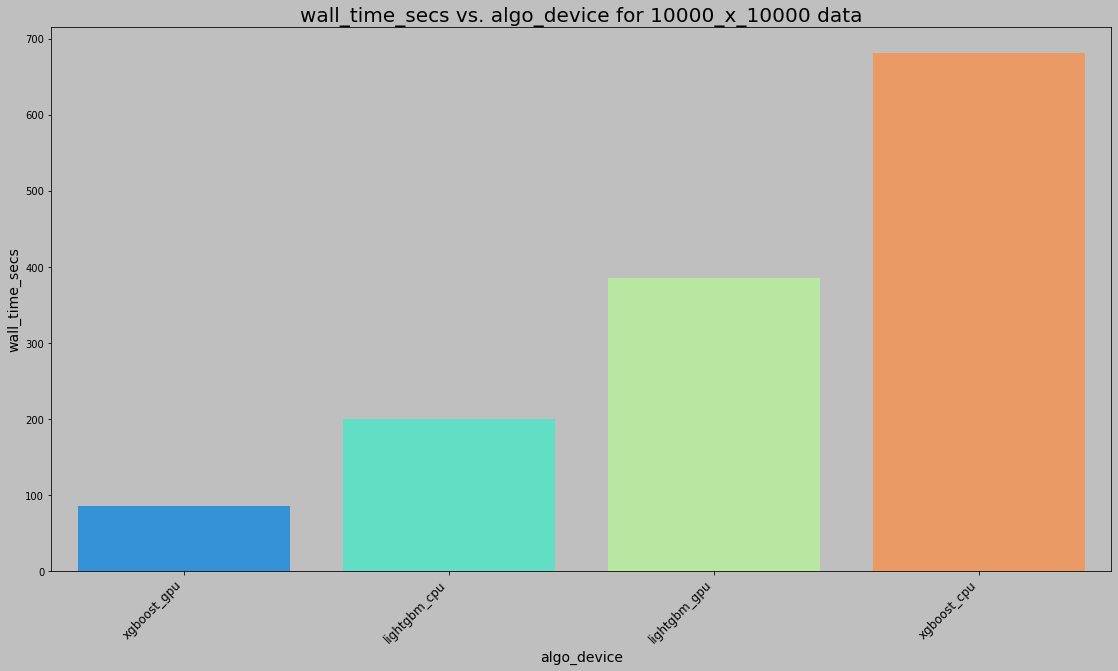

data_shape == "10000_x_10000" :
             wall_time_secs
algo_device                
xgboost_gpu           84.98
lightgbm_cpu         199.87
lightgbm_gpu         385.35
xgboost_cpu          680.56





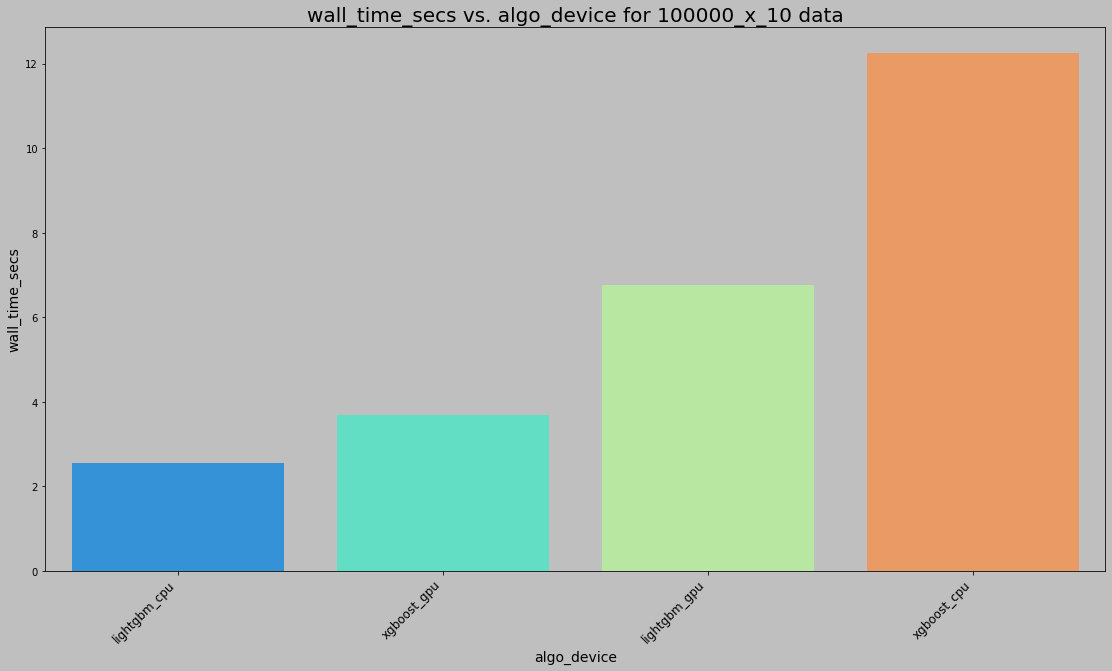

data_shape == "100000_x_10" :
             wall_time_secs
algo_device                
lightgbm_cpu           2.56
xgboost_gpu            3.70
lightgbm_gpu           6.75
xgboost_cpu           12.24





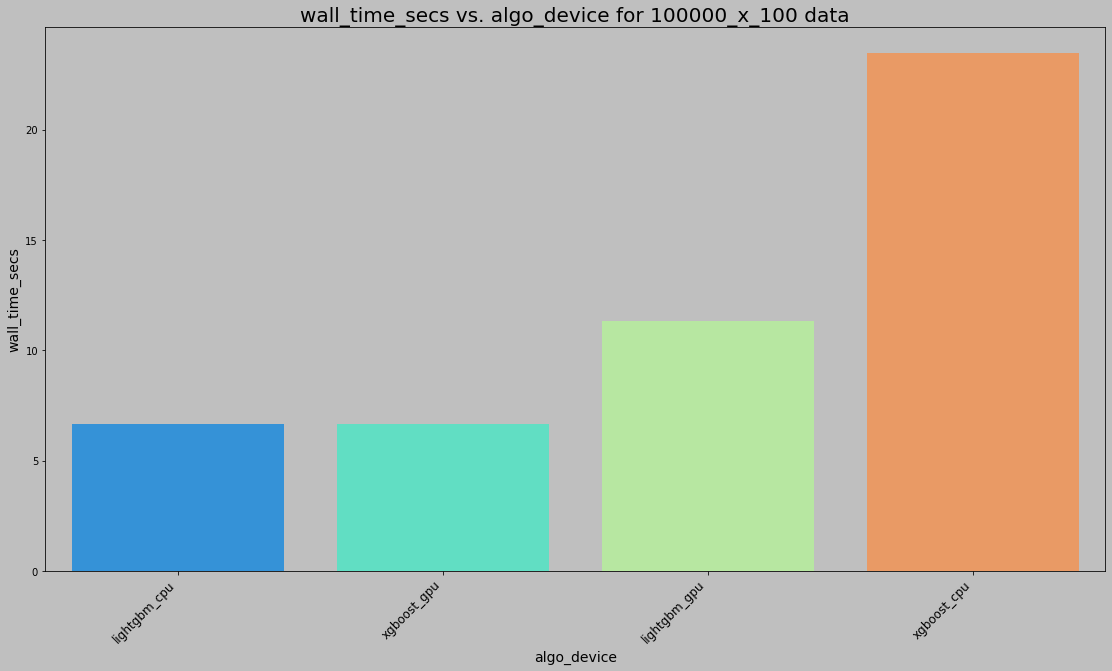

data_shape == "100000_x_100" :
             wall_time_secs
algo_device                
lightgbm_cpu           6.64
xgboost_gpu            6.65
lightgbm_gpu          11.31
xgboost_cpu           23.46





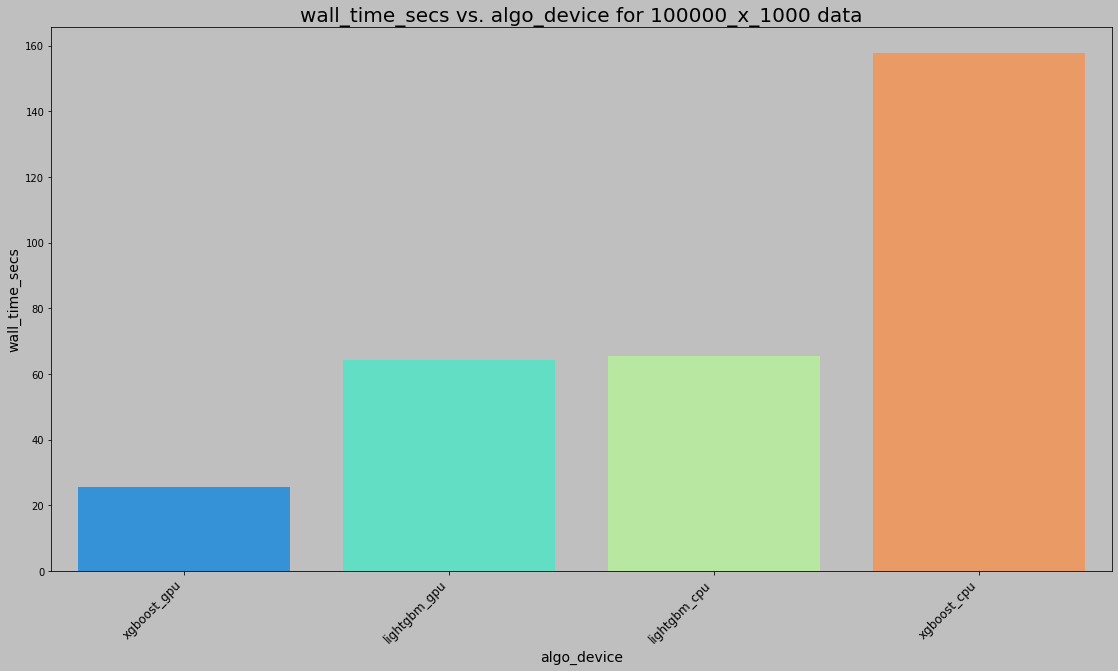

data_shape == "100000_x_1000" :
             wall_time_secs
algo_device                
xgboost_gpu           25.61
lightgbm_gpu          64.18
lightgbm_cpu          65.41
xgboost_cpu          157.69





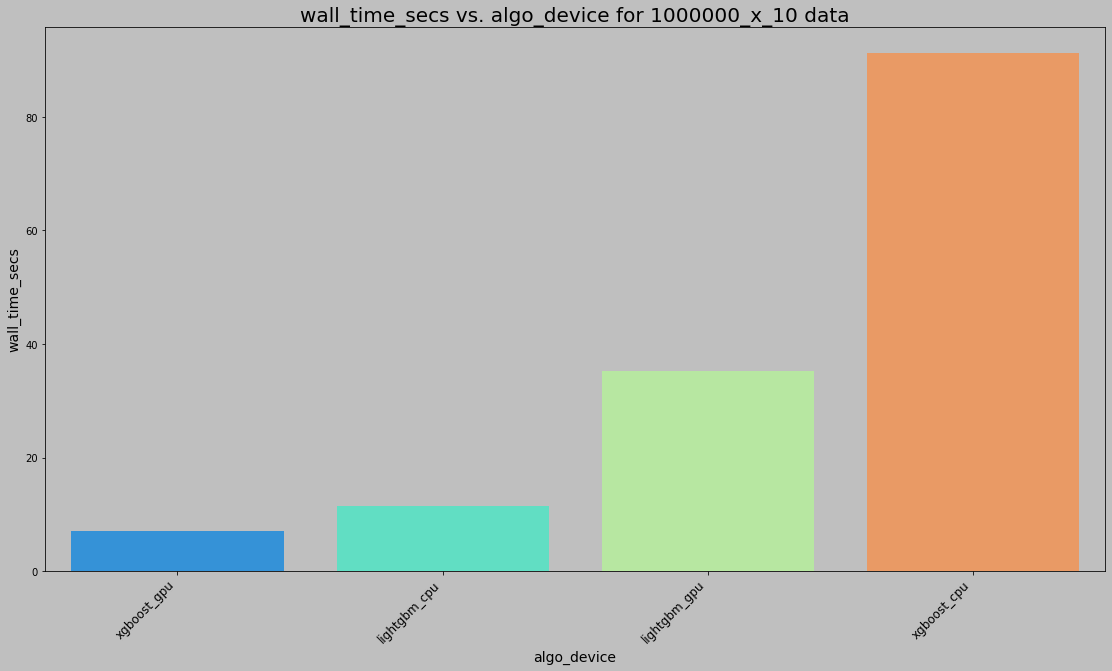

data_shape == "1000000_x_10" :
             wall_time_secs
algo_device                
xgboost_gpu            6.98
lightgbm_cpu          11.44
lightgbm_gpu          35.29
xgboost_cpu           91.21





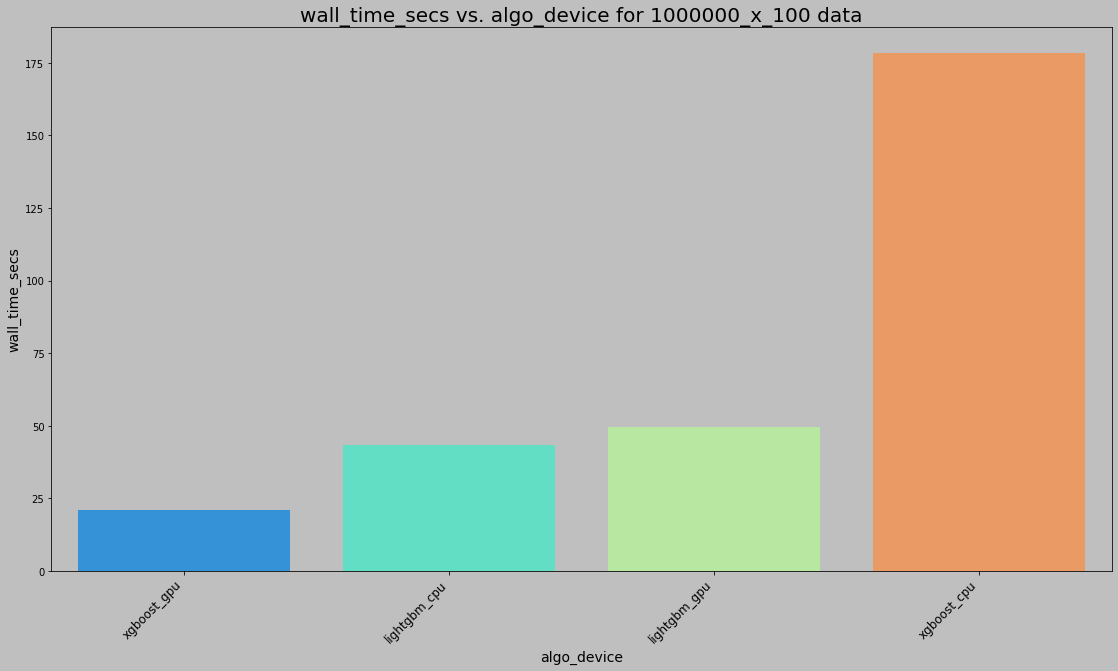

data_shape == "1000000_x_100" :
             wall_time_secs
algo_device                
xgboost_gpu           21.10
lightgbm_cpu          43.57
lightgbm_gpu          49.61
xgboost_cpu          178.29





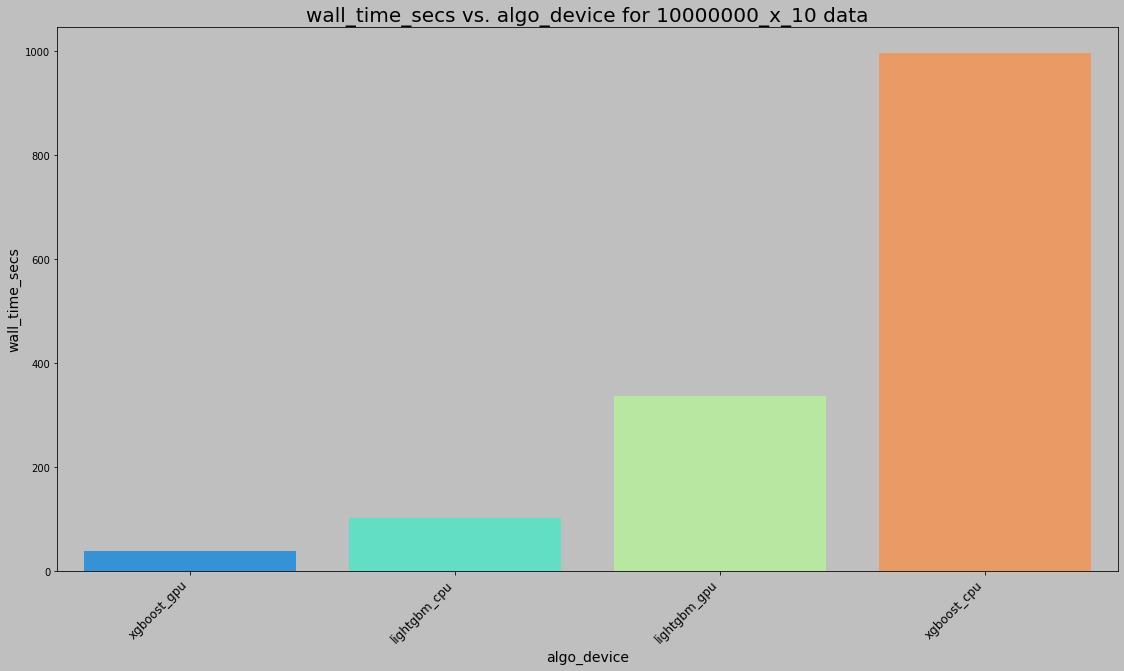

data_shape == "10000000_x_10" :
             wall_time_secs
algo_device                
xgboost_gpu           39.44
lightgbm_cpu         102.63
lightgbm_gpu         336.75
xgboost_cpu          995.49





In [172]:
# plot compute times grouped by each combination
# of device, algo, and total_items

# define results col
results_col='wall_time_secs'

# define params columns
params_cols = ['algo_device_cores', 'algo_device']
print(params_cols)

# establish common parameters range
# (in terms of percentiles)
# note: means have narrower 
# ranges than individual models
use_common_range=False
min_perc_to_plot = 1
max_perc_to_plot = 99
results_min, results_max = np.round(np.percentile(plotted_results_df[results_col], [min_perc_to_plot, max_perc_to_plot]), 3)
print(results_min, results_max)


for param in params_cols:

    for data_shape in data_shapes_list:

        # narrow down the data subset for comparability
        # query='device == "%s" & algo == "%s" & data_shape == "%s"' % (device, algo, data_shape)            
        query='data_shape == "%s"' % (data_shape)        

        # group results values by the levels of the current parameter
        results_by_param = plotted_results_df.query(query).groupby(param).mean()[results_col]
        # sort query results by results col (asc left to right)
        results_by_param = results_by_param.sort_values(ascending=True, inplace=False)
        
        # define font color as an universally 
        # visible font color (even on dark backgrounds)
        font_color='black'
        # font_color='darkgreen'
        # define plot canvass color 
        # with less eye-strain than white
        plot_color=(0.75, 0.75, 0.75) # silver
        
        plt.figure(figsize=(19,10), facecolor=plot_color) # 1900x1000
                
        ax = sns.barplot(x=results_by_param.index,
                     y=results_by_param, 
                     alpha=1.0, palette="rainbow")
        ax.set_facecolor(plot_color)

        if use_common_range:
            # set common y axis range
            ax.set_ylim([results_min, results_max])
            
        # set label names
        plt.xlabel(param, fontsize=14, color=font_color)
        plt.ylabel(results_col, fontsize=14, color=font_color)
        
        # rotate x-axis labels to make them fit
        plt.xticks(rotation=45, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='large', color=font_color)
        
        # total_items_log = np.log(total_items)
        plt.title("%s vs. %s for %s data" % (results_col, param, data_shape), fontsize=20, color=font_color)

        plt.show();

        print(query,":")
        print(pd.DataFrame(results_by_param).applymap("{0:.2f}".format))

        print("\n\n")


## All data

In [164]:
# get distributions of compute times
# for all combinations of data_shape and algo_device_cores

devices=list(results_df['device'].value_counts().index)
algos=list(results_df['algo'].value_counts().index)
total_items_list=list(results_df['total_items'].value_counts().index)
data_shapes_list=list(results_df['data_shape'].value_counts().index)
algo_devices_list=list(results_df['algo_device'].value_counts().index)
algo_devices_cores_list=list(results_df['algo_device_cores'].value_counts().index)

for data_shape in data_shapes_list:
 
    for algo_device_cores in algo_devices_cores_list:

        query='data_shape == "%s" & algo_device_cores == "%s"' % (data_shape, algo_device_cores)

        print("\n",query,":")
        print(results_df.query(query)['wall_time_secs'].describe())



 data_shape == "10000_x_10" & algo_device_cores == "lightgbm_gpu_1_cores" :
count    1095.000000
mean        3.397576
std         0.053293
min         3.327865
25%         3.355615
50%         3.378664
75%         3.451323
max         3.513022
Name: wall_time_secs, dtype: float64

 data_shape == "10000_x_10" & algo_device_cores == "xgboost_gpu_1_cores" :
count    579.000000
mean       3.107201
std        0.043163
min        3.054769
25%        3.069570
50%        3.100283
75%        3.127380
max        3.587084
Name: wall_time_secs, dtype: float64

 data_shape == "10000_x_10" & algo_device_cores == "xgboost_cpu_4_cores" :
count    540.000000
mean       2.689642
std        0.043493
min        2.651273
25%        2.651273
50%        2.684941
75%        2.688496
max        2.801322
Name: wall_time_secs, dtype: float64

 data_shape == "10000_x_10" & algo_device_cores == "lightgbm_cpu_4_cores" :
count    540.000000
mean       1.370781
std        0.039093
min        1.298513
25%        1.34

count    545.000000
mean      84.976265
std        0.371850
min       84.569071
25%       84.594918
50%       84.952656
75%       85.357248
max       85.850127
Name: wall_time_secs, dtype: float64

 data_shape == "10000_x_10000" & algo_device_cores == "xgboost_cpu_4_cores" :
count    525.000000
mean     779.053611
std       27.542942
min      735.850006
25%      765.297784
50%      783.746971
75%      806.135899
max      806.135899
Name: wall_time_secs, dtype: float64

 data_shape == "10000_x_10000" & algo_device_cores == "lightgbm_cpu_4_cores" :
count    525.000000
mean     289.494660
std       23.273553
min      260.500781
25%      260.500781
50%      306.991845
75%      306.991845
max      317.593967
Name: wall_time_secs, dtype: float64

 data_shape == "10000_x_10000" & algo_device_cores == "xgboost_cpu_8_cores" :
count    480.000000
mean     604.222435
std       24.295053
min      569.185233
25%      579.377241
50%      593.721635
75%      632.220300
max      632.220300
Name: wall_

count    435.000000
mean      34.839736
std        1.330491
min       33.390394
25%       33.390394
50%       35.228552
75%       36.455151
max       36.855928
Name: wall_time_secs, dtype: float64

 data_shape == "100000_x_1000" & algo_device_cores == "xgboost_cpu_32_cores" :
count    388.000000
mean     102.341199
std        1.082367
min      101.152707
25%      101.152707
50%      101.737174
75%      103.530128
max      103.530128
Name: wall_time_secs, dtype: float64

 data_shape == "100000_x_1000" & algo_device_cores == "lightgbm_cpu_32_cores" :
count    388.000000
mean      27.347030
std        1.043537
min       26.020299
25%       26.511081
50%       27.087879
75%       27.664678
max       29.211170
Name: wall_time_secs, dtype: float64

 data_shape == "100000_x_1000" & algo_device_cores == "xgboost_cpu_64_cores" :
count    348.000000
mean     582.189195
std        4.462673
min      578.060581
25%      578.060581
50%      581.454530
75%      587.939256
max      588.054030
Name: wa

count     57.000000
mean     458.817889
std        2.593802
min      456.299940
25%      456.299940
50%      456.299940
75%      461.221484
max      461.857027
Name: wall_time_secs, dtype: float64
